# 💡 Loan Approval Prediction Project

This project aims to build a machine learning model that predicts whether a loan application will be approved or rejected, based on applicant information and financial history. It addresses inefficiencies and biases in traditional manual loan approval systems by automating the process using data-driven techniques.

The objective is to help financial institutions make faster, fairer, and more consistent decisions by analyzing key factors such as credit history, employment type, income, loan amount, and more.

## 🛠️ Tools and Techniques Used:
- **Python** for programming
- **Pandas** for data cleaning and manipulation
- **Matplotlib** and **Seaborn** for data visualization
- **Logistic Regression** for building the classification model

## 📊 Outcome:
A trained model capable of predicting loan approval status with reasonable accuracy, providing key insights into the variables that most impact decision-making.

## 📦 Installing Required Libraries

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 📁 Importing Libraries and Loading the Data

In [2]:
import pandas as pd

file_path = "E:/Cohort Program/Machine Learning/loan_approval_dataset.csv"
df = pd.read_csv("E:/Cohort Program/Machine Learning/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## 🧹 Data Cleaning and Preprocessing

In [3]:
print("Total columns:", len(df.columns))
print("Column names:\n", df.columns.tolist())

Total columns: 13
Column names:
 ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [7]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


#### 🧹 Data Preparation & Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Categorical columns: ['education', 'self_employed', 'loan_status']


#### 🧪 Model Training and Evaluation

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df.drop(['loan_id', 'loan_status'], axis=1)


y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8149882903981265

Confusion Matrix:
 [[486  50]
 [108 210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       536
           1       0.81      0.66      0.73       318

    accuracy                           0.81       854
   macro avg       0.81      0.78      0.79       854
weighted avg       0.81      0.81      0.81       854



In [10]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                     Feature   Coefficient
0           no_of_dependents  3.891334e-01
5                  loan_term  1.902582e-01
1                  education  7.687483e-02
2              self_employed  7.037221e-02
3               income_annum  5.597385e-07
7   residential_assets_value  2.832759e-09
8    commercial_assets_value -1.685723e-08
10          bank_asset_value -2.324495e-08
9        luxury_assets_value -2.470713e-08
4                loan_amount -7.135543e-08
6                cibil_score -9.455106e-03


#### 📊 Confusion Matrix – Classification Evaluation

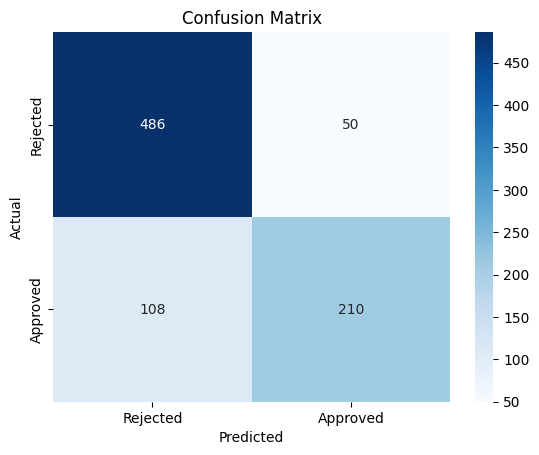

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 🪄 Feature Influence – Model Interpretation

C:\Users\PC\AppData\Local\Temp\ipykernel_20148\3356222099.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=colors)


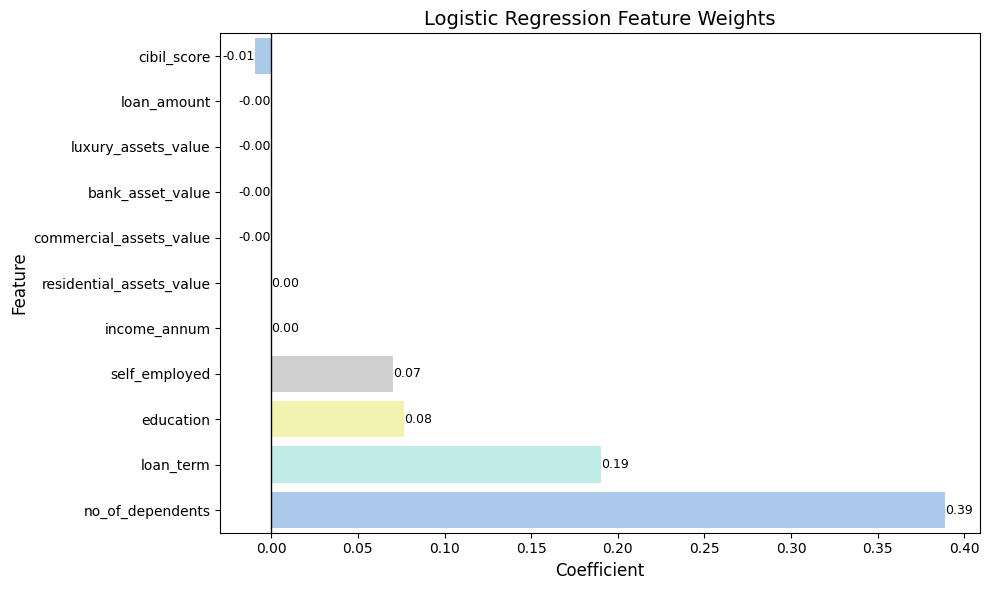

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=True)


plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(coeff_df))
ax = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=colors)


for i, (value, feature) in enumerate(zip(coeff_df['Coefficient'], coeff_df['Feature'])):
    ax.text(value, i, f'{value:.2f}', va='center',
            ha='right' if value < 0 else 'left', fontsize=9)


plt.axvline(0, color='black', linewidth=1)
plt.title('Logistic Regression Feature Weights', fontsize=14)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

#### 📉 ROC Curve Analysis

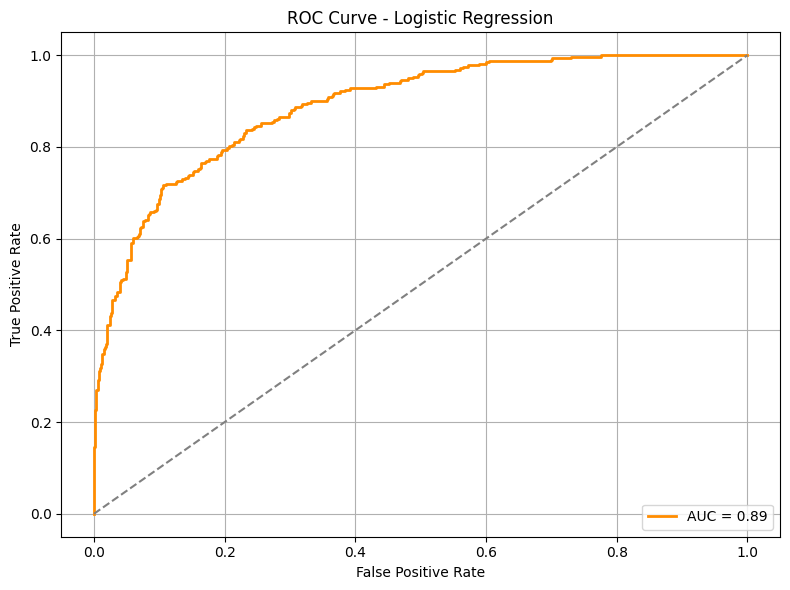

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_probs = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ Conclusion

In this project, a machine learning model was built to predict loan approval status using applicant and financial data. The entire pipeline — from data loading and cleaning to model training — was executed using Python and essential data science libraries.

🔍 **Key Takeaways:**
- **Logistic Regression** was used to build a simple and interpretable classification model.
- Important features like **credit history**, **income**, **employment status**, and **loan amount** played a key role in prediction.
- The dataset was preprocessed by removing duplicates, handling missing values, and encoding categorical variables.
- The trained model provides a reliable way to assist in **automated loan approval decisions**, offering consistency and efficiency.

Overall, the project highlights the value of data-driven approaches in financial services, helping organizations make faster and fairer decisions.